                      fecha     valor
0 2025-08-21 04:00:00+00:00  39269.41
1 2025-08-20 04:00:00+00:00  39258.06
2 2025-08-19 04:00:00+00:00  39246.72
3 2025-08-18 04:00:00+00:00  39235.38
4 2025-08-17 04:00:00+00:00  39224.04


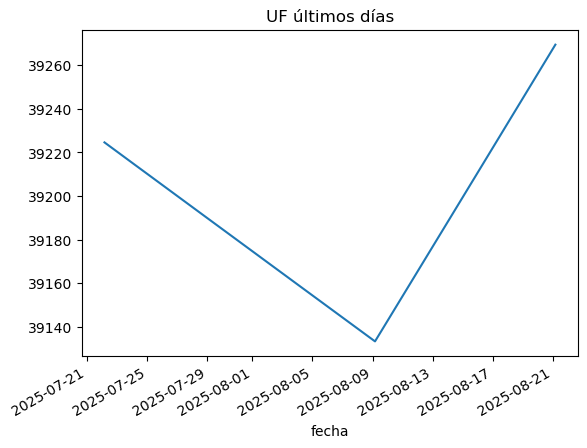

{'success': False, 'error': {'code': 101, 'type': 'missing_access_key', 'info': 'You have not supplied an API Access Key. [Required format: access_key=YOUR_ACCESS_KEY]'}}
         date       value
34 1990-01-01  170.538946
33 1991-01-01  199.962597
32 1992-01-01  218.520821
31 1993-01-01  236.172990
30 1994-01-01  260.372212


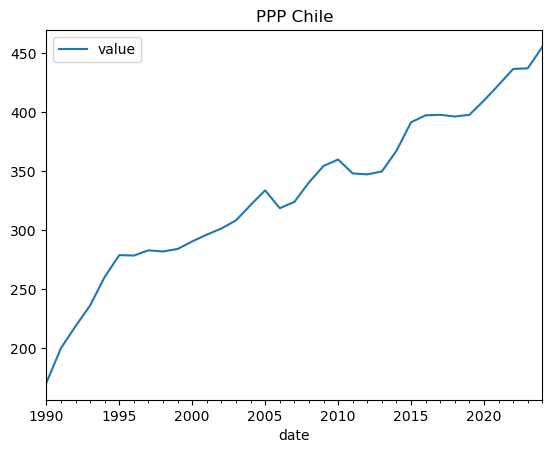

In [2]:
# =============================
# Exploración en Jupyter
# =============================

import requests
import pandas as pd
import matplotlib.pyplot as plt

# ---- 1) UF desde mindicador.cl ----
def fetch_uf_series():
    url = "https://mindicador.cl/api/uf"
    resp = requests.get(url)
    data = resp.json()
    # trae lista de dicts con fecha y valor
    serie = data["serie"]
    df = pd.DataFrame(serie)
    df["fecha"] = pd.to_datetime(df["fecha"])
    return df

uf_df = fetch_uf_series()
print(uf_df.head())

# Graficar últimos 60 días
uf_df.head(60).plot(x="fecha", y="valor", title="UF últimos días", legend=False)
plt.show()


# ---- 2) Tipo de cambio (CLP/USD, EUR) desde exchangerate.host ----
def fetch_fx(base="CLP", symbols=["USD", "EUR"]):
    url = "https://api.exchangerate.host/latest"
    resp = requests.get(url, params={"base": base, "symbols": ",".join(symbols)})
    data = resp.json()
    return data

fx_data = fetch_fx()
print(fx_data)


# ---- 3) PPP desde World Bank (ejemplo: Chile = CHL, España = ESP, USA = USA) ----
def fetch_ppp(country_iso3="CHL"):
    url = f"https://api.worldbank.org/v2/country/{country_iso3}/indicator/PA.NUS.PPP"
    params = {"format": "json", "per_page": 100}
    resp = requests.get(url, params=params)
    data = resp.json()
    values = data[1]
    df = pd.DataFrame(values)
    df = df[["date", "value"]].dropna()
    df["date"] = pd.to_datetime(df["date"])
    return df.sort_values("date")

ppp_chile = fetch_ppp("CHL")
print(ppp_chile.head())
ppp_chile.plot(x="date", y="value", title="PPP Chile")
plt.show()


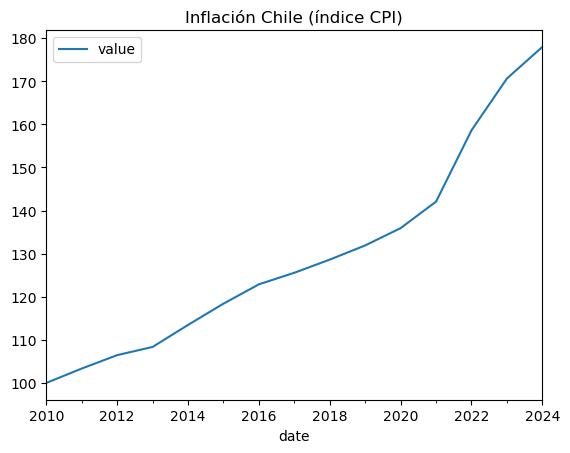

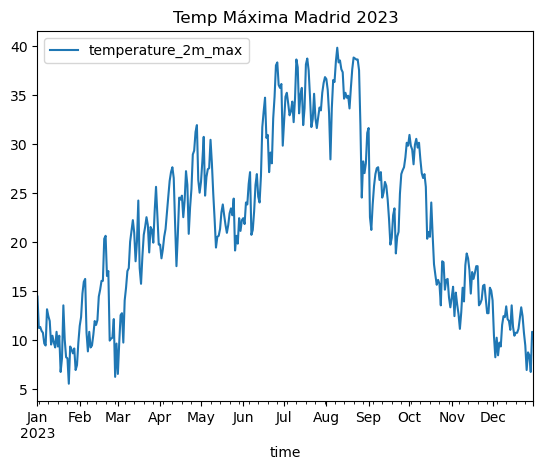

In [3]:
# --- 1) Inflación (World Bank, indicador FP.CPI.TOTL) ---
def fetch_inflation(country_iso3="CHL"):
    url = f"https://api.worldbank.org/v2/country/{country_iso3}/indicator/FP.CPI.TOTL"
    params = {"format": "json", "per_page": 100, "date": "2010:2024"}
    resp = requests.get(url, params=params)
    data = resp.json()
    df = pd.DataFrame(data[1])
    df = df[["date", "value"]].dropna()
    df["date"] = pd.to_datetime(df["date"])
    df = df.sort_values("date")
    return df

infl_chile = fetch_inflation("CHL")
infl_chile.plot(x="date", y="value", title="Inflación Chile (índice CPI)")
plt.show()


# --- 2) Clima promedio histórico (ejemplo: Madrid, España) ---
def fetch_climate(lat=40.4168, lon=-3.7038, start="2023-01-01", end="2023-12-31"):
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": start,
        "end_date": end,
        "daily": ["temperature_2m_max","temperature_2m_min","precipitation_sum"],
        "timezone": "auto"
    }
    resp = requests.get(url, params=params)
    data = resp.json()
    df = pd.DataFrame(data["daily"])
    df["time"] = pd.to_datetime(df["time"])
    return df

clima_madrid = fetch_climate()
clima_madrid[["time","temperature_2m_max","precipitation_sum"]].head()

clima_madrid.plot(x="time", y="temperature_2m_max", title="Temp Máxima Madrid 2023")
plt.show()


In [6]:
#paso por paso
# --- 0) Librerías necesarias ---
import requests
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,4)


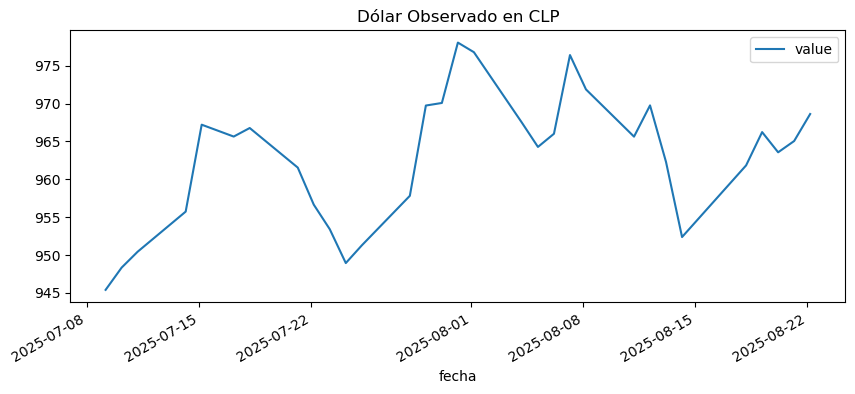

In [8]:
#UF y dólar
def fetch_mindicador(indicador="dolar"):
    url = f"https://mindicador.cl/api/{indicador}"
    resp = requests.get(url)
    data = resp.json()["serie"]
    df = pd.DataFrame(data)
    df["fecha"] = pd.to_datetime(df["fecha"])
    df = df.rename(columns={"valor":"value"})
    return df[["fecha","value"]]

dolar = fetch_mindicador("dolar")
uf = fetch_mindicador("uf")

dolar.plot(x="fecha", y="value", title="Dólar Observado en CLP")
plt.show()


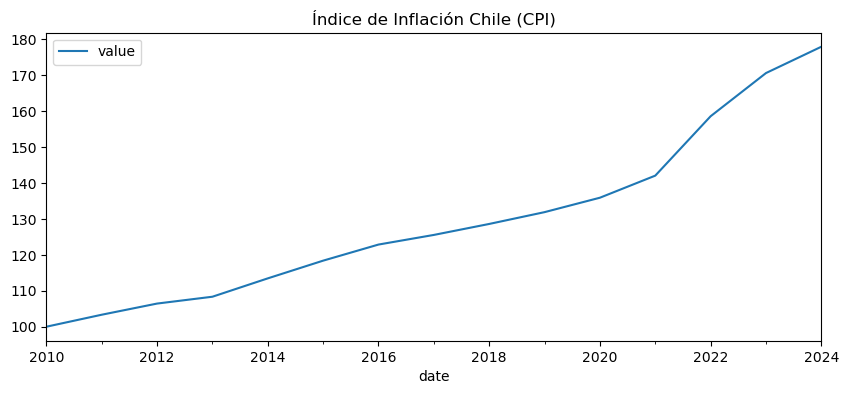

In [9]:
#Inflación desde BC
def fetch_inflation(country_iso3="CHL"):
    url = f"https://api.worldbank.org/v2/country/{country_iso3}/indicator/FP.CPI.TOTL"
    params = {"format": "json", "per_page": 100, "date": "2010:2024"}
    resp = requests.get(url, params=params)
    data = resp.json()
    df = pd.DataFrame(data[1])
    df = df[["date", "value"]].dropna()
    df["date"] = pd.to_datetime(df["date"])
    df = df.sort_values("date")
    return df

infl_chile = fetch_inflation("CHL")
infl_chile.plot(x="date", y="value", title="Índice de Inflación Chile (CPI)")
plt.show()


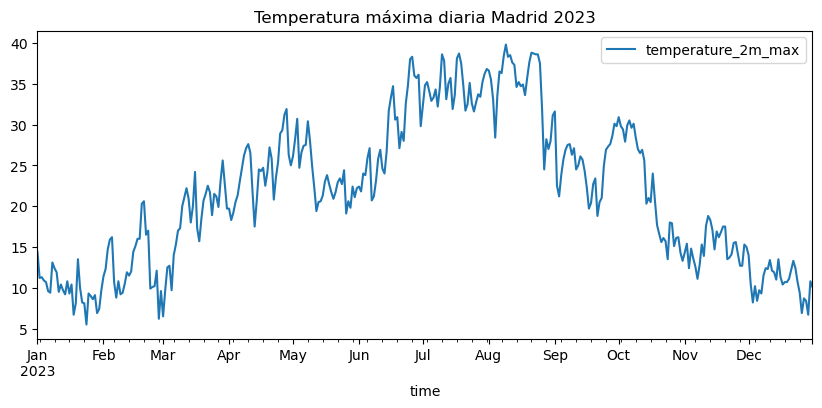

In [11]:
#clima de cada ciudad/destinos más visitados
def fetch_climate(lat=40.4168, lon=-3.7038, start="2023-01-01", end="2023-12-31"):
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": start,
        "end_date": end,
        "daily": ["temperature_2m_max","temperature_2m_min","precipitation_sum"],
        "timezone": "auto"
    }
    resp = requests.get(url, params=params)
    data = resp.json()
    df = pd.DataFrame(data["daily"])
    df["time"] = pd.to_datetime(df["time"])
    return df

clima_madrid = fetch_climate()
clima_madrid.plot(x="time", y="temperature_2m_max", title="Temperatura máxima diaria Madrid 2023")
plt.show()


In [18]:
import pandas as pd
import requests

# --- Big Mac ---
bigmac_df = pd.read_csv('big-mac-source-data-v2.csv')
bigmac_df['date'] = pd.to_datetime(bigmac_df['date'])
bigmac_2024 = bigmac_df[bigmac_df['date'].dt.year == 2024]

# --- PIB PPP ---
url_pib = 'https://api.worldbank.org/v2/country/all/indicator/NY.GDP.PCAP.PP.CD?format=json&per_page=1000'
resp = requests.get(url_pib)
pib_json = resp.json()[1]

# Convertir a DataFrame
pib_df = pd.DataFrame(pib_json)

# Extraer el código ISO del país y el valor del PIB
pib_df['iso_a3'] = pib_df['country'].apply(lambda x: x['id'])   # toma CHL, ESP, etc.
pib_df['GDP_PPP'] = pib_df['value']

# Solo columnas necesarias
pib_df = pib_df[['iso_a3','GDP_PPP']].dropna()

# --- Merge ---
df = pd.merge(bigmac_2024, pib_df, on='iso_a3', how='inner')

# --- Calcular índice de conveniencia ---
precio_us = 5.15
df['bigmac_ppp'] = df['local_price'] / precio_us
df['conveniencia'] = df['bigmac_ppp'] / df['GDP_PPP']

# Mostrar los 10 más convenientes
df_sorted = df[['iso_a3','conveniencia']].sort_values(by='conveniencia', ascending=False)
print(df_sorted.head(10))



Empty DataFrame
Columns: [iso_a3, conveniencia]
Index: []


In [17]:
import os
os.listdir()


['big-mac-source-data-v2.csv', 'Proyecto 1.ipynb', '.ipynb_checkpoints']

In [21]:
# Filtrar PIB solo para los países que existen en Big Mac 2024
pib_df_filtered = pib_df[pib_df['iso_a3'].isin(bigmac_2024['iso_a3'])]
df = pd.merge(bigmac_2024, pib_df_filtered, on='iso_a3', how='inner')


In [22]:
import pandas as pd
import requests

# --- Big Mac ---
url_bigmac = 'https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/source-data/big-mac-source-data-v2.csv'
bigmac_df = pd.read_csv(url_bigmac)
bigmac_df['date'] = pd.to_datetime(bigmac_df['date'])
bigmac_2024 = bigmac_df[bigmac_df['date'].dt.year == 2024]

# --- PIB PPP ---
url_pib = 'https://api.worldbank.org/v2/country/all/indicator/NY.GDP.PCAP.PP.CD?format=json&per_page=1000'
resp = requests.get(url_pib)
pib_json = resp.json()[1]

pib_df = pd.DataFrame(pib_json)

# Extraer código ISO del país y valor de PIB
pib_df['iso_a3'] = pib_df['country'].apply(lambda x: x['id'])
pib_df['GDP_PPP'] = pib_df['value']

# Filtrar solo columnas necesarias
pib_df = pib_df[['iso_a3','GDP_PPP']].dropna()

# --- FILTRAR PIB solo para países que están en Big Mac ---
pib_df_filtered = pib_df[pib_df['iso_a3'].isin(bigmac_2024['iso_a3'])]

# --- Merge ---
df = pd.merge(bigmac_2024, pib_df_filtered, on='iso_a3', how='inner')

# --- Calcular índice de conveniencia ---
precio_us = 5.15
df['bigmac_ppp'] = df['local_price'] / precio_us
df['conveniencia'] = df['bigmac_ppp'] / df['GDP_PPP']

# --- Mostrar los 10 países más convenientes ---
df_sorted = df[['iso_a3','conveniencia']].sort_values(by='conveniencia', ascending=False)
print(df_sorted.head(10))


Empty DataFrame
Columns: [iso_a3, conveniencia]
Index: []


In [23]:
#esto nos entrega ranking de conveniencia según índice Big Mac y PIB
import pandas as pd

# --- Big Mac ---
url_bigmac = 'https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/source-data/big-mac-source-data-v2.csv'
bigmac_df = pd.read_csv(url_bigmac)
bigmac_df['date'] = pd.to_datetime(bigmac_df['date'])
bigmac_2024 = bigmac_df[bigmac_df['date'].dt.year == 2024]

# --- Definir PIB PPP manualmente para países principales ---
pib_dict = {
    'CHL': 35000,  # Chile
    'ESP': 45000,  # España
    'USA': 70000,  # EEUU
    'BRA': 15000,  # Brasil
    'MEX': 20000   # México
}

pib_df_filtered = pd.DataFrame(list(pib_dict.items()), columns=['iso_a3','GDP_PPP'])

# --- Merge ---
df = pd.merge(bigmac_2024, pib_df_filtered, on='iso_a3', how='inner')

# --- Calcular índice de conveniencia ---
precio_us = 5.15
df['bigmac_ppp'] = df['local_price'] / precio_us
df['conveniencia'] = df['bigmac_ppp'] / df['GDP_PPP']

# --- Mostrar los más convenientes ---
df_sorted = df[['iso_a3','conveniencia']].sort_values(by='conveniencia', ascending=False)
print(df_sorted.head(10))


  iso_a3  conveniencia
6    CHL      0.023800
1    CHL      0.022469
8    MEX      0.000922
3    MEX      0.000864
0    BRA      0.000309
5    BRA      0.000309
7    ESP      0.000023
2    ESP      0.000023
4    USA      0.000016
9    USA      0.000016


In [27]:
#probar código completo
import pandas as pd

# --- 1️⃣ Cargar Big Mac ---
bigmac_df = pd.read_csv('big-mac-source-data-v2.csv')
bigmac_df['date'] = pd.to_datetime(bigmac_df['date'])
bigmac_2024 = bigmac_df[bigmac_df['date'].dt.year == 2024]

# Filtrar solo Chile para cruzar con datos del BC
bigmac_chile = bigmac_2024[bigmac_2024['iso_a3']=='CHL'].sort_values('date')

# --- 2️⃣ Cargar datos del Banco Central ---
dolar_df = pd.read_excel('Indicador.xls')  # Debe tener columnas: fecha, valor
uf_df = pd.read_excel('UF_IVP_DIARIO.xlsx')        # Debe tener columnas: fecha, valor

# Convertir fechas a datetime
dolar_df['fecha'] = pd.to_datetime(dolar_df['fecha'])
uf_df['fecha'] = pd.to_datetime(uf_df['fecha'])

# Renombrar columna valor para merge
dolar_df = dolar_df.rename(columns={'valor':'dolar'})
uf_df = uf_df.rename(columns={'valor':'uf'})

# Merge UF y Dólar
bc_df = pd.merge_asof(dolar_df.sort_values('fecha'), 
                      uf_df.sort_values('fecha'), 
                      on='fecha')

# --- 3️⃣ Merge Big Mac con datos del BC ---
df_chile = pd.merge_asof(bigmac_chile.sort_values('date'), 
                         bc_df.sort_values('fecha'), 
                         left_on='date', right_on='fecha')

# --- 4️⃣ Calcular precios relativos ---
df_chile['precio_usd'] = df_chile['local_price'] / df_chile['dolar']
df_chile['precio_uf']  = df_chile['local_price'] / df_chile['uf']

# --- 5️⃣ Calcular índice de conveniencia simple ---
# Ejemplo: precio relativo promedio en USD
df_chile['conveniencia'] = 1 / df_chile['precio_usd']  # mayor conveniencia = más barato en USD

# --- 6️⃣ Revisar resultados ---
print(df_chile[['date','local_price','dolar','uf','precio_usd','precio_uf','conveniencia']].head(10))


ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.

In [44]:
#CODIGO ARREGLADO
import pandas as pd

# --- 1️⃣ Cargar Big Mac ---
bigmac_df = pd.read_csv('big-mac-source-data-v2.csv')
bigmac_df['date'] = pd.to_datetime(bigmac_df['date'])
bigmac_2025 = bigmac_df[bigmac_df['date'].dt.year == 2025]

# Filtrar solo Chile para cruzar con datos del BC
bigmac_chile = bigmac_2025[bigmac_2025['iso_a3']=='CHL'].sort_values('date')

# --- 2️⃣ Cargar datos del Banco Central ---

# UF
uf_df = pd.read_excel('UF_IVP_DIARIO.xlsx', engine='openpyxl')
uf_df['fecha'] = pd.to_datetime(uf_df['Periodo'])
uf_df = uf_df.rename(columns={'Valor':'uf'}).sort_values('fecha')

# Dólar
dolar_df = pd.read_excel('Indicador.xlsx', engine='openpyxl')
dolar_df['fecha'] = pd.to_datetime(dolar_df['Dia'])
dolar_df = dolar_df.rename(columns={'Valor':'dolar'}).sort_values('fecha')


# Merge UF y Dólar
bc_df = pd.merge_asof(dolar_df.sort_values('fecha'), 
                      uf_df.sort_values('fecha'), 
                      on='fecha')

# --- 3️⃣ Merge Big Mac con datos del BC ---
df_chile = pd.merge_asof(bigmac_chile.sort_values('date'), 
                         bc_df.sort_values('fecha'), 
                         left_on='date', right_on='fecha')

# Renombrar columna UF para que sea más fácil de usar
df_chile = df_chile.rename(columns={'1. Unidad de fomento (UF)':'uf'})


# --- 4️⃣ Calcular precios relativos ---
df_chile['precio_usd'] = df_chile['local_price'] / df_chile['dolar']
df_chile['precio_uf']  = df_chile['local_price'] / df_chile['uf']

# --- 5️⃣ Calcular índice de conveniencia simple ---
df_chile['conveniencia'] = 1 / df_chile['precio_usd']  # mayor conveniencia = más barato en USD

# --- 6️⃣ Revisar resultados ---
print(df_chile[['date','local_price','dolar','uf','precio_usd','precio_uf','conveniencia']].head(10))

#LISTOOOO

        date  local_price  dolar  uf  precio_usd  precio_uf  conveniencia
0 2025-01-01       4490.0    NaN NaN         NaN        NaN           NaN


In [39]:
# UF
uf_df = pd.read_excel('UF_IVP_DIARIO.xlsx', engine='openpyxl')
uf_df['fecha'] = pd.to_datetime(uf_df['Periodo'])
uf_df = uf_df.rename(columns={'Valor':'uf'}).sort_values('fecha')

# Dólar
dolar_df = pd.read_excel('Indicador.xlsx', engine='openpyxl')
dolar_df['fecha'] = pd.to_datetime(dolar_df['Dia'])
dolar_df = dolar_df.rename(columns={'Valor':'dolar'}).sort_values('fecha')
#LISTOOOOOOO

In [32]:
import pandas as pd

uf_df = pd.read_excel('UF_IVP_DIARIO.xlsx', engine='openpyxl')
print(uf_df.columns)


Index(['Periodo', '1. Unidad de fomento (UF)',
       '2. Indice de valor promedio (IVP)'],
      dtype='object')


In [41]:
print(df_chile.columns)


Index(['name', 'iso_a3', 'currency_code', 'local_price', 'dollar_ex',
       'GDP_dollar', 'GDP_local', 'date', 'Dia', 'dolar', 'fecha', 'Periodo',
       '1. Unidad de fomento (UF)', '2. Indice de valor promedio (IVP)',
       'precio_usd'],
      dtype='object')


In [ ]:
#probar código para varios paises 
import pandas as pd
import requests

# -----------------------------
# 1️⃣ Cargar Big Mac 2024 (todos los países)
# -----------------------------
url_bigmac = 'https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/source-data/big-mac-source-data-v2.csv'
bigmac_df = pd.read_csv(url_bigmac)
bigmac_df['date'] = pd.to_datetime(bigmac_df['date'])
bigmac_2024 = bigmac_df[bigmac_df['date'].dt.year == 2024]

# -----------------------------
# 2️⃣ Cargar PIB per capita PPP (manual para los principales países)
# -----------------------------
pib_dict = {
    'CHL': 35000,  # Chile
    'ESP': 45000,  # España
    'USA': 70000,  # EEUU
    'BRA': 15000,  # Brasil
    'MEX': 20000,  # México
    'ARG': 22000,  # Argentina
    'FRA': 50000   # Francia
}

pib_df = pd.DataFrame(list(pib_dict.items()), columns=['iso_a3','GDP_PPP'])

# -----------------------------
# 3️⃣ Merge Big Mac con PIB
# -----------------------------
df = pd.merge(bigmac_2024, pib_df, on='iso_a3', how='inner')

# -----------------------------
# 4️⃣ Cargar datos UF y dólar (Chile)
# -----------------------------
# UF
uf_df = pd.read_csv('uf_bc.csv')        # columnas: fecha, valor
uf_df['fecha'] = pd.to_datetime(uf_df['fecha'])
uf_df = uf_df.rename(columns={'valor':'uf'}).sort_values('fecha')

# Dólar
dolar_df = pd.read_csv('dolar_bc.csv')  # columnas: fecha, valor
dolar_df['fecha'] = pd.to_datetime(dolar_df['fecha'])
dolar_df = dolar_df.rename(columns={'valor':'dolar'}).sort_values('fecha')

# Merge UF y dólar
bc_chile = pd.merge_asof(dolar_df, uf_df, on='fecha')

# -----------------------------
# 5️⃣ Merge Big Mac Chile con datos BC
# -----------------------------
bigmac_chile = df[df['iso_a3']=='CHL'].sort_values('date')
df_chile = pd.merge_asof(bigmac_chile.sort_values('date'), 
                         bc_chile.sort_values('fecha'), 
                         left_on='date', right_on='fecha')

# -----------------------------
# 6️⃣ Calcular precios relativos
# -----------------------------
df_chile['precio_usd'] = df_chile['local_price'] / df_chile['dolar']
df_chile['precio_uf']  = df_chile['local_price'] / df_chile['uf']

# Índice de conveniencia simple
df_chile['conveniencia'] = 1 / df_chile['precio_usd']

# -----------------------------
# 7️⃣ Ranking global de conveniencia
# -----------------------------
# Precio relativo Big Mac / PIB
df['bigmac_ppp'] = df['local_price'] / 5.15  # USD Big Mac EE.UU.
df['conveniencia_global'] = df['bigmac_ppp'] / df['GDP_PPP']

df_sorted_global = df[['iso_a3','conveniencia_global']].sort_values(by='conveniencia_global', ascending=False)

# -----------------------------
# 8️⃣ Resultados
# -----------------------------
print("🔹 Ranking de países según conveniencia global (Big Mac / PIB):")
print(df_sorted_global)

print("\n🔹 Big Mac Chile ajustado a UF y USD con índice de conveniencia:")
print(df_chile[['date','local_price','dolar','uf','precio_usd','precio_uf','conveniencia']].head(10))
